# Anharmonic Oscillator

First we set $\hbar = m = 1$ to simplify the terms
\begin{eqnarray}
a=\sqrt{\frac{\omega}{2}} x + \frac{ip}{\sqrt{2\omega}}  \\
a^{\dagger}=\sqrt{\frac{\omega}{2}} x - \frac{ip}{\sqrt{2\omega}} \, .
\end{eqnarray}
Adding the two operators results in
\begin{equation}
 a + a^{\dagger} = \sqrt{2\omega} x \, ,
\end{equation}
hence the anharmonic part of the Hamiltonian is
\begin{equation}
H_{\text{anharmonic}} = \frac{K}{4\omega^2} (a + a^{\dagger})^4 \, .
\end{equation}

Let us now expand the $(a+a^{\dagger})^4$ using the commutator relation $[a,a^{\dagger}] = a a^{\dagger} - a^{\dagger} a = 1$ and the identity $a^{\dagger} a = \hat n$:
$$\begin{align}
 ( a + a^{\dagger})^4  &=  (a a + a a^{\dagger} + a^{\dagger} a + a^{\dagger} a^{\dagger})^2 \\
  &=  ( a a + 2 a^{\dagger} a + 1 + a^{\dagger} a^{\dagger})^2 \\
  &=  a^4 + 2 a a \hat n + 2 a a + 2 \hat n a a + 6 \hat n^2 + 6 \hat n + 3 + 2 \hat n a^{\dagger} a^{\dagger} \\
  &\quad + 2 a^{\dagger} a^{\dagger} \hat n + 2 a^{\dagger} a^{\dagger} + (a^{\dagger})^4
\end{align}$$

Using $a | n \rangle = \sqrt{n} | n -1 \rangle$, $ a^{\dagger} | n \rangle = \sqrt{n+1} | n+1 \rangle$ and $ \langle m | n \rangle = \delta_{m,n}$
we obtain following non-zero matrix elements:
$$\begin{align}
    \langle n | 6 \hat n^2 + 6 \hat n + 3 | n \rangle &= 6 n^2 + 6 n + 3 \\
    \langle n + 2 | 2 \hat n a^{\dagger} a^{\dagger} + 2 a^{\dagger} a^{\dagger} + 2 a^{\dagger} a^{\dagger} \hat n | n \rangle & = \langle n | 2 a a \hat n + 2 a a + 2 \hat a a | n + 2\rangle \\
    & =(4 n + 6) \sqrt{ (n+1) (n+2) } \\
    \langle n + 4 | (a^{\dagger})^4 | n \rangle & = \langle n | a^4 | n+4 \rangle \\
    & = \sqrt{(n+1) \cdot (n+2) \cdot (n+3) \cdot (n+4)}
\end{align}$$

A solution code setting up and diagonalizing a matrix for a given cutoff $N$ is given below.
The dependence of the  energy spectrum on the anharmonicity $K$ is shown in figure at the bottom.
We observe the expected equally spaced energy spectrum of the harmonic oscillator at $K=0$.
For the anharmonic oscillator ($K > 0$) the difference between two consecutive energy levels grows with increasing anharmonicity and increasing energy.

In [2]:
import numpy as np
import numpy.linalg as la
from numpy import sqrt

# interactive plots
#%matplotlib notebook
# nice inline plots
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 16, 9

In [8]:
def anharm_mtx(N,K):
    # set m = hbar = 1
    w = 1
    f = K/(4*w*w)
    mtx = np.zeros((N,N))

    for row in range(N):
        for col in range(N):
            n = min(row,col)
            if col == row:
                mtx[row,col] += w*(row+0.5)
                mtx[row,col] += f*3*(row**2+(row+1)**2)
            if col == row + 2 or col + 2 == row:
                mtx[row,col] += f*(4*n+6)*sqrt((n+1)*(n+2))
            if col == row + 4 or col + 4 == row:
                 mtx[row,col] += f*sqrt((n+1)*(n+2)*(n+3)*(n+4))
    return mtx

def anharm(N,K,verbose=False):
    # set m = hbar = 1
    mtx = anharm_mtx(N,K)    
    if verbose:
        print('=== Hamiltonian for N=%s, K=%s ===' % (N, K))
        print(np.around(mtx, decimals=1))
    vals,vecs = la.eig(mtx)
    return np.sort(vals)

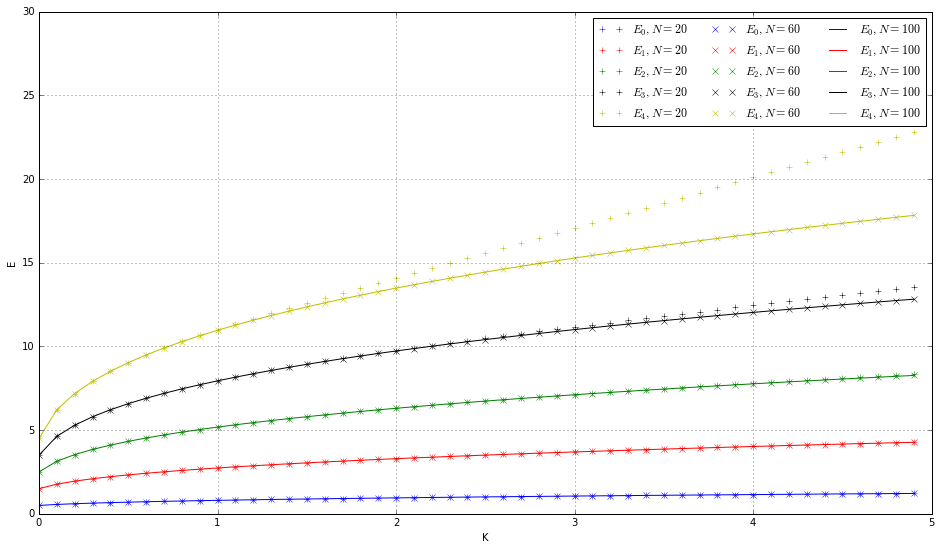

In [10]:
N = 100
keeps = 5
Ks = np.arange(0,5,0.1)

markers = ['+', 'x', '-', 'o']
colors = ['b', 'r', 'g', 'k', 'y']
plt.figure()
imark = 0
for N in [20,60,100]:
    vals = np.zeros((len(Ks), keeps))
    for k,K in enumerate(Ks):
        eigs = anharm(N=N, K=K)
        for i in range(keeps):
            vals[k,i] = eigs[i]
    icolor = 0
    for i in range(keeps):
        plt.plot(Ks, vals[:,i], markers[imark % len(markers)] + colors[icolor % len(colors)],
                 label='$E_%d, N=%s$' % (i, N))
        icolor += 1
    imark += 1
plt.legend(loc='best',ncol=3)
plt.ylim(0,30)
plt.xlabel('K')
plt.ylabel('E')
plt.grid()
plt.show()

While for three lowest energy states ($E_0, E_1, E_2$) a cutoff of $N = 20$ eigen-states of the harmonic oscillator yields good approximations for $K < 5$, we need to use at least $N=60$ eigen-states to approximate the 3rd and 4th excited state properly.